In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how = 'right', on = 'Mouse ID')

In [3]:
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
total_mice = mouse_study_df['Mouse ID'].unique()
total_mice_count = len(total_mice)
total_mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_mice_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice) == False]
clean_total_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_total_mouse_count = len(clean_total_mice_df['Mouse ID'].unique())
clean_total_mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mice = clean_total_mice_df.loc[:, ['Mouse ID',
                                        'Drug Regimen',
                                        'Tumor Volume (mm3)']]

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
mean = summary_mice.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = summary_mice.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var = summary_mice.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std = summary_mice.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = summary_mice.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [11]:
# Assemble the resulting series into a single summary dataframe.
drug_results_df = pd.DataFrame({'Tumor Volume Mean' :mean,
                                'Tumor Volume Median' :median,
                                'Tumor Volume Variance' :var,
                                'Tumor Volume Standard Deviation' :std,
                                'Tumor Volume SEM' :sem})
drug_results_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

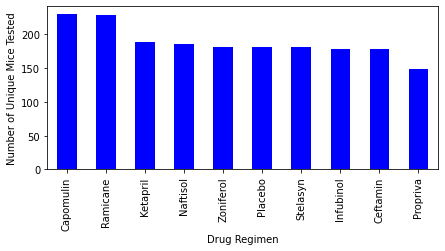

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_count = clean_total_mice_df['Drug Regimen'].value_counts()
unique_mice = clean_total_mice_df.groupby('Drug Regimen')['Mouse ID'].nunique()
x_axis = drug_count.index
y_axis = unique_mice.values
drug_count.plot(kind = 'bar', facecolor = 'blue', figsize = (7,3))

# Format chart
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.xticks(rotation=90)
plt.savefig('../Images/pandas_drug_regimen_bar.jpg', bbox_inches='tight')
plt.show()

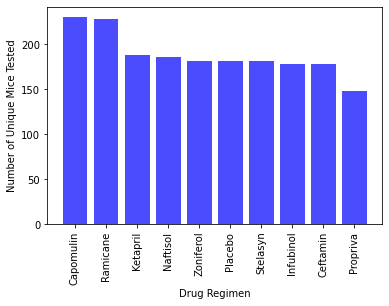

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_count = clean_total_mice_df['Drug Regimen'].value_counts()
unique_mice = clean_total_mice_df['Mouse ID'].unique()
x_axis = np.arange(0, len(y_axis), 1)
y_axis = drug_count.values
x_drugs = drug_count.index
tick_locations = [value for value in x_axis]
plt.bar(x_drugs, y_axis, color = 'b', alpha = 0.7, align = "center")

# Format chart
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.xticks(rotation=90)
plt.savefig('../Images/pyplot_drug_regimen_bar.jpg', bbox_inches='tight')
plt.show()

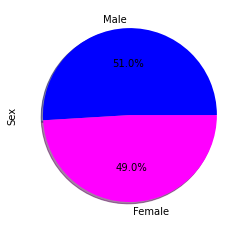

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = clean_total_mice_df['Sex'].value_counts()
labels = mf_count.values
sizes = mf_count.values
colors = ['blue', 'magenta']
mf_count.plot(kind = 'pie', colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 360)

#Formatting
plt.ylabel('Sex')
plt.savefig('../Images/pandas_mouse_sex_pie.jpg', bbox_inches='tight')
plt.show()

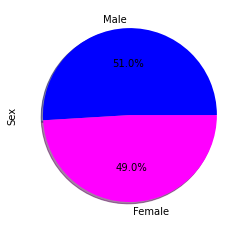

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = clean_total_mice_df["Sex"].value_counts()
labels = mf_count.index 
sizes = mf_count.values
colors = ['blue', 'magenta']
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 360)

#Formatting
plt.ylabel('Sex')
plt.savefig('../Images/pyplot_mouse_sex_pie.jpg', bbox_inches='tight')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_total_mice_df.groupby('Mouse ID').max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data_df = max_tumor[['Mouse ID', 'Timepoint']].merge(clean_total_mice_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
merge_data_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
capomulin = merge_data_df.loc[merge_data_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = merge_data_df.loc[merge_data_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = merge_data_df.loc[merge_data_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merge_data_df.loc[merge_data_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Capomulin quartiles
quartile_cap = capomulin.quantile([.25,.5,.75])
lower_cap = quartile_cap[.25]
upper_cap = quartile_cap[.75]
iqr = upper_cap - lower_cap

# Capomulin Outliers
lower_ocap = lower_cap - (1.5*iqr)
upper_ocap = upper_cap + (1.5*iqr)

# Ramicane quartiles
quartile_ram = ramicane.quantile([.25,.5,.75])
lower_ram = quartile_ram[.25]
upper_ram = quartile_ram[.75]
iqr = upper_ram - lower_ram

# Ramicane Outliers
lower_oram = lower_ram - (1.5*iqr)
upper_oram = upper_ram + (1.5*iqr)

# Infubionol quartiles
quartile_inf = infubinol.quantile([.25,.5,.75])
lower_inf = quartile_inf[.25]
upper_inf = quartile_inf[.75]
iqr = upper_inf - lower_inf

# Infubionol Outliers
lower_oinf = lower_inf - (1.5*iqr)
upper_oinf = upper_inf + (1.5*iqr)

# Ceftmain quartiles
quartile_cef = ceftamin.quantile([.25,.5,.75])
lower_cef = quartile_cef[.25]
upper_cef = quartile_cef[.75]
iqr = upper_cef - lower_cef

# Ceftmain Outliers
lower_ocef = lower_cef - (1.5*iqr)
upper_ocef = upper_cef + (1.5*iqr)
    
print(f'Any number below {(lower_ocap)} or above {(upper_ocap)} is considered a Capomulin outlier')   
print(f'Any number below {(lower_oram)} or above {(upper_oram)} is considered a Ramicane outlier') 
print(f'Any number below {(lower_oinf)} or above {(upper_oinf)} is considered a Infubionol outlier') 
print(f'Any number below {(lower_ocef)} or above {(upper_ocef)} is considered a Ceftmain outlier') 

Any number below 20.70456164999999 or above 51.83201549 is considered a Capomulin outlier
Any number below 17.912664470000003 or above 54.30681135 is considered a Ramicane outlier
Any number below 36.83290494999999 or above 82.74144559000001 is considered a Infubionol outlier
Any number below 25.355449580000002 or above 87.66645829999999 is considered a Ceftmain outlier


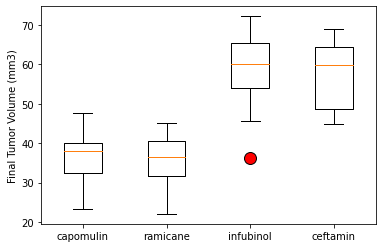

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor = dict(markerfacecolor = 'red',markersize = 12)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = ['capomulin', 'ramicane', 'infubinol', 'ceftamin'], flierprops = final_tumor)

# Format
plt.ylabel('Final Tumor Volume (mm3)')
plt.savefig('../Images/final_tumor_volume_box.jpg')
plt.show()

## Line and Scatter Plots

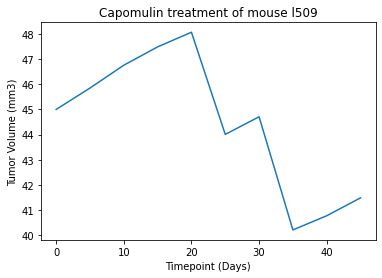

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_total_mice_df.loc[clean_total_mice_df['Drug Regimen'] == 'Capomulin']
mouse = clean_total_mice_df.loc[clean_total_mice_df['Mouse ID'] == 'l509']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Format
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.savefig('../Images/tumor_volume_time_point_line.jpg')
plt.show()

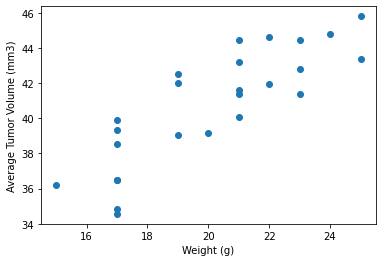

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight = clean_total_mice_df.loc[clean_total_mice_df['Drug Regimen'] == 'Capomulin']
cap_avg = capomulin_weight.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

# Format
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('../Images/avg_tumor_vol_mouse_weight_scatter.jpg')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


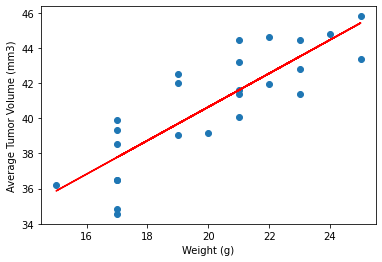

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
regress_values = cap_avg['Weight (g)']* slope + intercept
line_eq = f'y = {round(slope, 2)} x + {round(intercept, 2)}'
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'] )

# Format
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(cap_avg['Weight (g)'], regress_values, color='red')
plt.savefig('../Images/avg_tumor_vol_mouse_weight_regression.jpg')
plt.show()